# **Modelo de regresión para predecir el valor de cargo de seguro**

En el siguiente trabajo utilizaremos técnicas de regresión de Machine learning para predecir el valor del cargo de un seguro de salud.

- Importamos librerías de manipulación y el visualización de datos:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- Cargamos el dataset:

In [4]:
df = pd.read_csv('./insurance_cleaned.csv')
df_copy = df.copy()

In [5]:
df_copy.head(5)

,Edad,Sexo,IMC,Hijos,Fumador,Región,Cargo
0,19,Mujer,27,0,Si,Suroeste,16884
1,18,Hombre,33,1,No,Sureste,1725
2,28,Hombre,33,3,No,Sureste,4449
3,33,Hombre,22,0,No,Noroeste,21984
4,32,Hombre,28,0,No,Noroeste,3866


- Exploramos las características del dataframe:

In [6]:
print('El dataframe tiene', df_copy.shape[0], 'registros y ', df_copy.shape[1], 'columnas')

El dataframe tiene 1338 registros y  7 columnas


In [7]:
df_copy.dtypes

Edad        int64
Sexo       object
IMC         int64
Hijos       int64
Fumador    object
Región     object
Cargo       int64
dtype: object

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Edad     1338 non-null   int64 
 1   Sexo     1338 non-null   object
 2   IMC      1338 non-null   int64 
 3   Hijos    1338 non-null   int64 
 4   Fumador  1338 non-null   object
 5   Región   1338 non-null   object
 6   Cargo    1338 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 73.3+ KB


In [9]:
df_copy.columns.tolist()

['Edad', 'Sexo', 'IMC', 'Hijos', 'Fumador', 'Región', 'Cargo']

- Análisis de las variables: 

Edad:

In [10]:
df_copy['Edad'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: Edad, dtype: float64

Text(0, 0.5, 'Frecuencia')

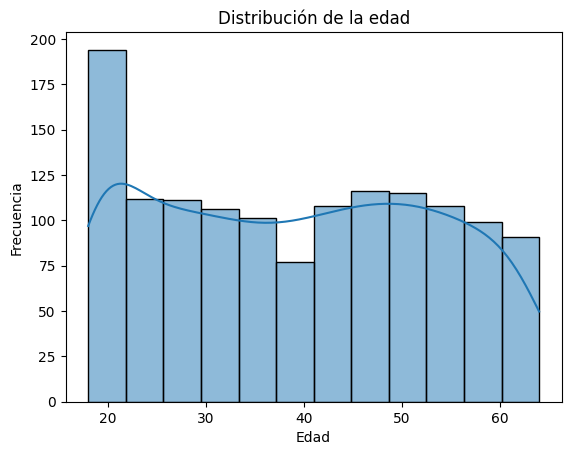

In [11]:
age_hist= sns.histplot(data=df_copy['Edad'], kde=True)
age_hist.set_title('Distribución de la edad')
age_hist.set_xlabel('Edad')
age_hist.set_ylabel('Frecuencia') 

Text(0.5, 0, 'Edad')

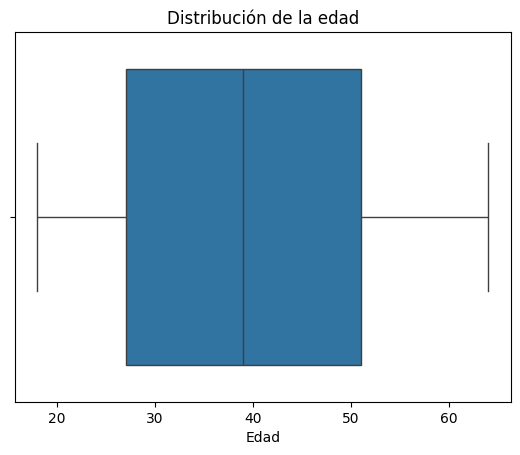

In [12]:
box_age=sns.boxplot(x='Edad', data=df_copy)
box_age.set_title('Distribución de la edad')
box_age.set_xlabel('Edad')

Sexo:

In [13]:
df_copy['Sexo'].value_counts().reset_index()

,Sexo,count
0,Hombre,676
1,Mujer,662


Text(0, 0.5, 'Frecuencia')

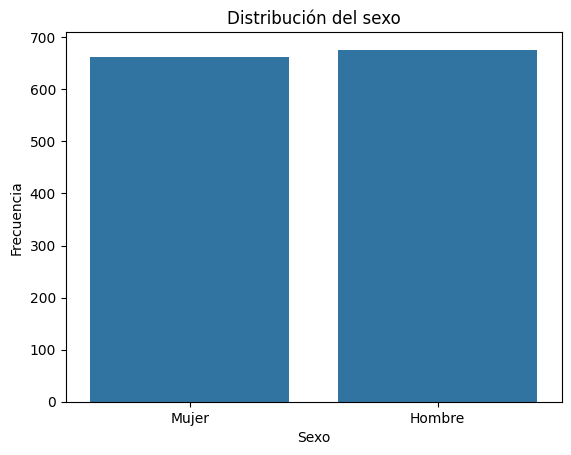

In [14]:
bar_sex=sns.countplot(x='Sexo', data=df_copy)
bar_sex.set_title('Distribución del sexo')
bar_sex.set_xlabel('Sexo')
bar_sex.set_ylabel('Frecuencia') 

Índice de masa corporal: 

In [15]:
df_copy['IMC'].describe()

count    1338.000000
mean       30.169656
std         6.119875
min        15.000000
25%        26.000000
50%        30.000000
75%        34.000000
max        53.000000
Name: IMC, dtype: float64

Text(0, 0.5, 'Frecuencia')

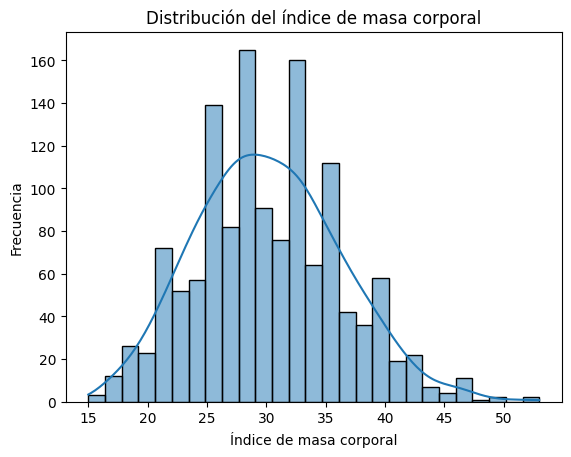

In [16]:
bmi_hist= sns.histplot(data=df_copy['IMC'], kde=True)
bmi_hist.set_title('Distribución del índice de masa corporal')
bmi_hist.set_xlabel('Índice de masa corporal')
bmi_hist.set_ylabel('Frecuencia') 

Text(0, 0.5, 'Índice de masa corporal')

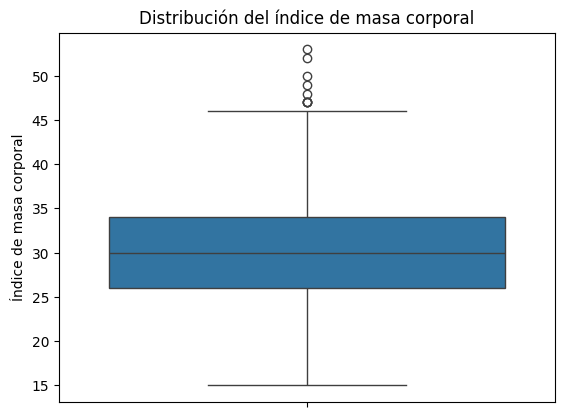

In [17]:
box_bmi=sns.boxplot(y='IMC', data=df_copy)
box_bmi.set_title('Distribución del índice de masa corporal')
box_bmi.set_ylabel('Índice de masa corporal') 

Cantidad de hijos:

In [18]:
df_copy['Hijos'].value_counts().reset_index()

,Hijos,count
0,0,574
1,1,324
2,2,240
3,3,157
4,4,25
5,5,18


Text(0, 0.5, 'Frecuencia')

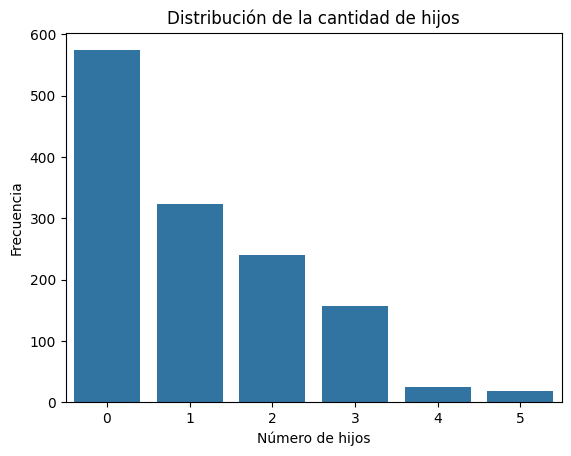

In [19]:
bar_children=sns.countplot(x='Hijos', data=df_copy)
bar_children.set_title('Distribución de la cantidad de hijos')
bar_children.set_xlabel('Número de hijos')
bar_children.set_ylabel('Frecuencia') 

Fumador

In [20]:
df_copy['Fumador'].value_counts().reset_index()

,Fumador,count
0,No,1064
1,Si,274


Text(0, 0.5, 'Frecuencia')

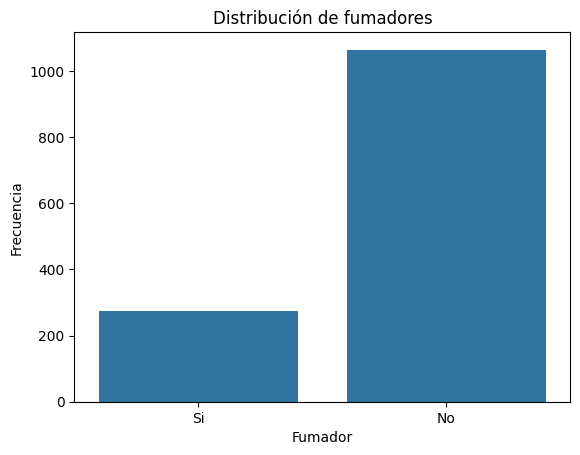

In [21]:
bar_smoker=sns.countplot(x='Fumador', data=df_copy)
bar_smoker.set_title('Distribución de fumadores')
bar_smoker.set_xlabel('Fumador')
bar_smoker.set_ylabel('Frecuencia') 

Región 

In [22]:
df_copy['Región'].value_counts().reset_index()

,Región,count
0,Sureste,364
1,Suroeste,325
2,Noroeste,325
3,Noreste,324


Text(0, 0.5, 'Región ')

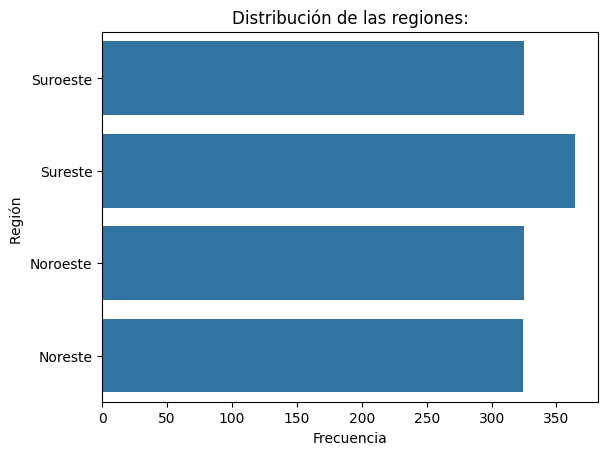

In [23]:
bar_region=sns.countplot(y='Región', data=df_copy)
bar_region.set_title('Distribución de las regiones:')
bar_region.set_xlabel('Frecuencia')
bar_region.set_ylabel('Región ') 

Target: Cargo

In [24]:
df_copy['Cargo'].describe()

count     1338.000000
mean     13269.928999
std      12110.012755
min       1121.000000
25%       4740.000000
50%       9381.500000
75%      16639.250000
max      63770.000000
Name: Cargo, dtype: float64

Text(0, 0.5, 'Frecuencia')

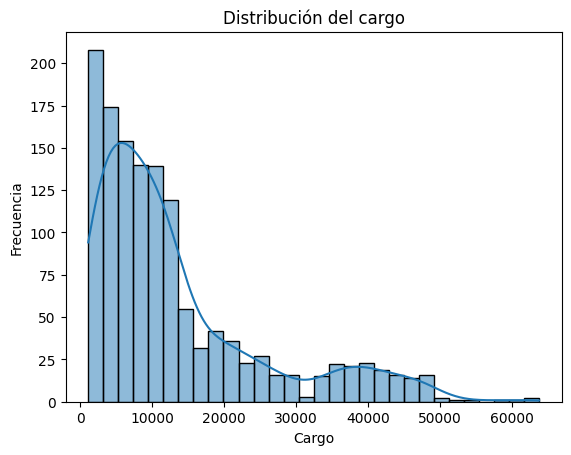

In [25]:
charges_hist= sns.histplot(data=df_copy['Cargo'], kde=True)
charges_hist.set_title('Distribución del cargo')
charges_hist.set_xlabel('Cargo')
charges_hist.set_ylabel('Frecuencia') 

Text(0.5, 0, 'Cargo')

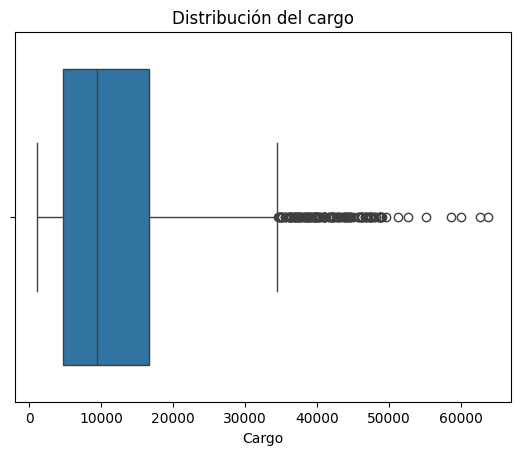

In [26]:
box_charge=sns.boxplot(x='Cargo', data=df_copy)
box_charge.set_title('Distribución del cargo')
box_charge.set_xlabel('Cargo')

- Visualización de los datos: 

In [27]:
mean_charge_by_sex= df.groupby(['Sexo', 'Fumador'])['Cargo'].mean().reset_index() 
mean_charge_by_sex['Cargo']= round(mean_charge_by_sex['Cargo'], 2)
mean_charge_by_sex

,Sexo,Fumador,Cargo
0,Hombre,No,8086.73
1,Hombre,Si,33041.52
2,Mujer,No,8761.79
3,Mujer,Si,30678.47


Text(0, 0.5, 'Cargo promedio')

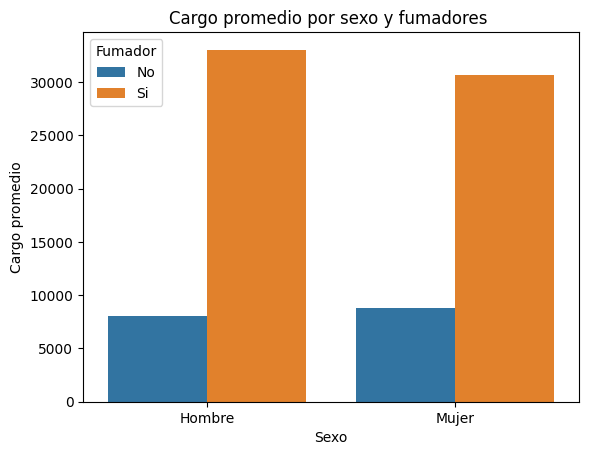

In [28]:
bar_mean_charge_by_sex=sns.barplot(x='Sexo', y= 'Cargo',hue="Fumador",data=mean_charge_by_sex)
bar_mean_charge_by_sex.set_title('Cargo promedio por sexo y fumadores ')
bar_mean_charge_by_sex.set_xlabel('Sexo')
bar_mean_charge_by_sex.set_ylabel('Cargo promedio')

Text(0.5, 23.52222222222222, 'Fumador')

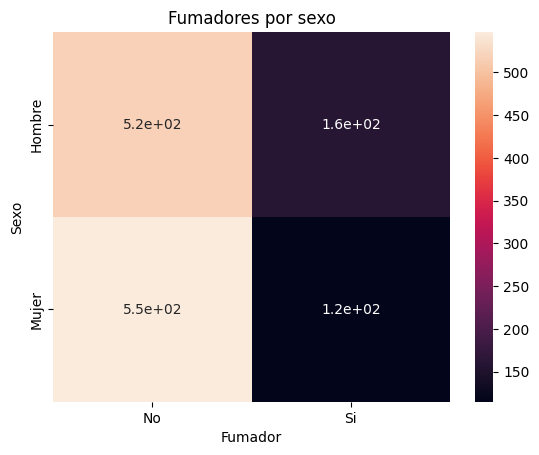

In [29]:
smoker_by_sex=pd.crosstab(df_copy['Sexo'], df_copy['Fumador'])
heat_smoker_by_sex=sns.heatmap(smoker_by_sex ,annot=True)
heat_smoker_by_sex.set_title('Fumadores por sexo')
heat_smoker_by_sex.set_ylabel('Sexo')
heat_smoker_by_sex.set_xlabel('Fumador')

El promedio del cargo no varía en gran medida entre hombre y mujeres, pero si hay una gran diferencia de más del 100% entre fumadores y no fumadores. Los fumadores pagan un cargo mayor que los no fumadores. 

In [30]:
mean_charge_by_region= df.groupby(['Región'])['Cargo'].mean().reset_index() 
mean_charge_by_region['Cargo'] = round(mean_charge_by_region['Cargo'], 2)
mean_charge_by_region

,Región,Cargo
0,Noreste,13405.91
1,Noroeste,12417.07
2,Sureste,14734.90
3,Suroeste,12346.45


Text(0, 0.5, 'Frecuencia')

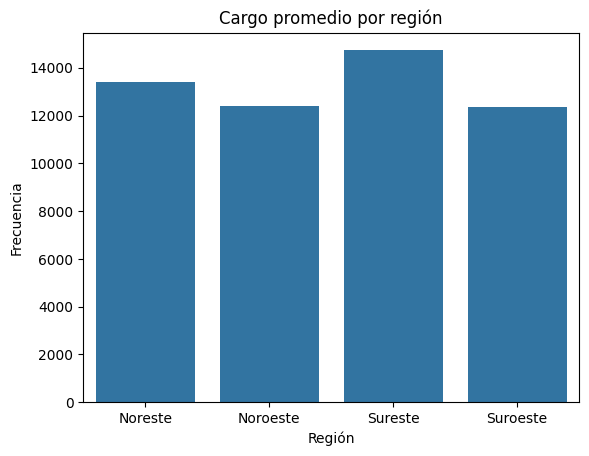

In [31]:
bar_mean_charge_by_region=sns.barplot(x='Región', y= 'Cargo',data=mean_charge_by_region)
bar_mean_charge_by_region.set_title('Cargo promedio por región')
bar_mean_charge_by_region.set_xlabel('Región')
bar_mean_charge_by_region.set_ylabel('Frecuencia')

Los promedios de las diferentes regiones varían desde 12.000 a 14.700. La región que tiene la prima más alta es la región sureste, y la  menor la región suroeste.

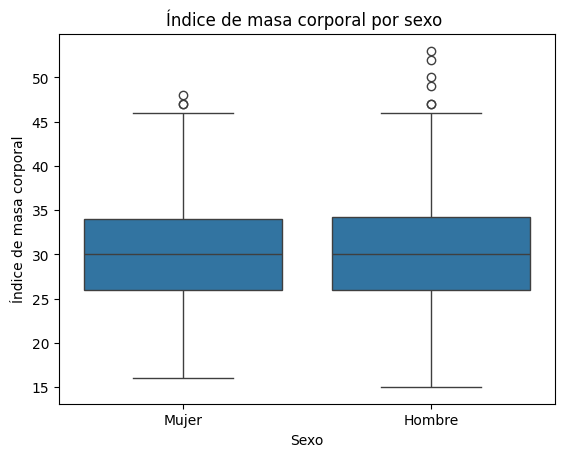

In [32]:
bmi_by_sex=sns.boxplot(x="Sexo",y="IMC", data=df_copy).set(title="Índice de masa corporal por sexo ",xlabel='Sexo',ylabel='Índice de masa corporal')

La media del índice de masa corporal en el hombre es levemente más alto que el de las mujeres. En los hombres se observan registros con un índice mayor a 50 mientras que en las mujeres ninguno supera ese número. 

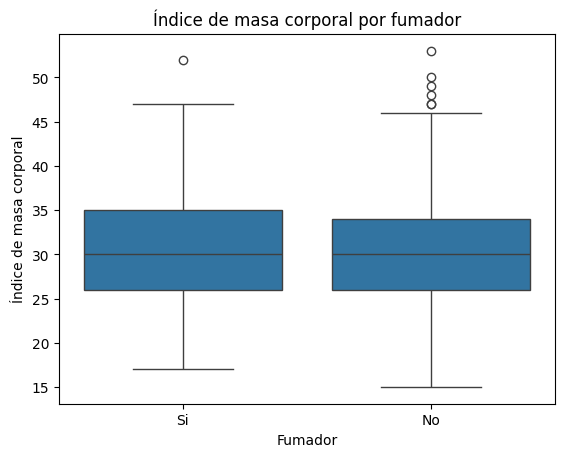

In [33]:
bmi_by_smoker=sns.boxplot(x="Fumador",y="IMC", data=df_copy).set(title="Índice de masa corporal por fumador",xlabel='Fumador',ylabel='Índice de masa corporal')

Text(0, 0.5, 'Cargo')

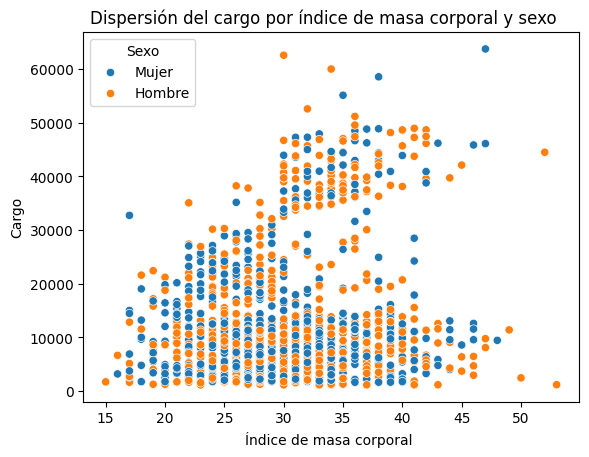

In [34]:
disp_bmi_by_charge=sns.scatterplot(data=df_copy, x="IMC", y="Cargo", hue='Sexo')
disp_bmi_by_charge.set_title('Dispersión del cargo por índice de masa corporal y sexo   ')
disp_bmi_by_charge.set_xlabel('Índice de masa corporal ')
disp_bmi_by_charge.set_ylabel('Cargo')

- Correlaciones: 

In [35]:
df_corr= df[['Edad', 'IMC', 'Cargo']]
df_corr.corr()

,Edad,IMC,Cargo
Edad,1.000000,0.108437,0.299009
IMC,0.108437,1.000000,0.196188
Cargo,0.299009,0.196188,1.000000


Text(0.5, 1.0, 'Correlaciones')

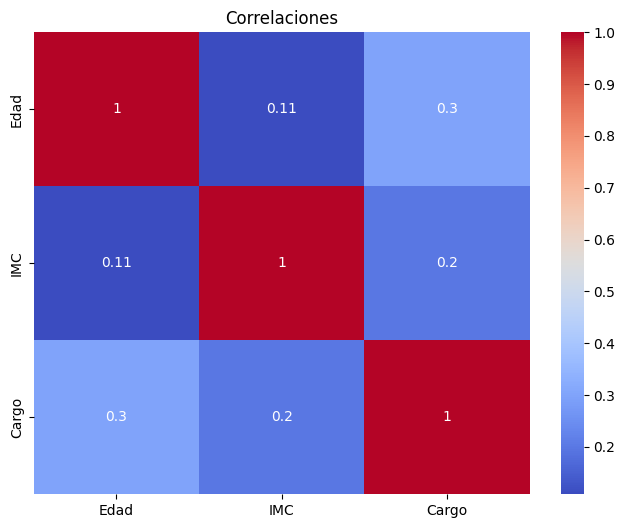

In [36]:
plt.figure(figsize=(8,6))
corr_heatmap=sns.heatmap(df_corr.corr(),cbar= True, cmap='coolwarm', annot = True)
plt.title('Correlaciones')

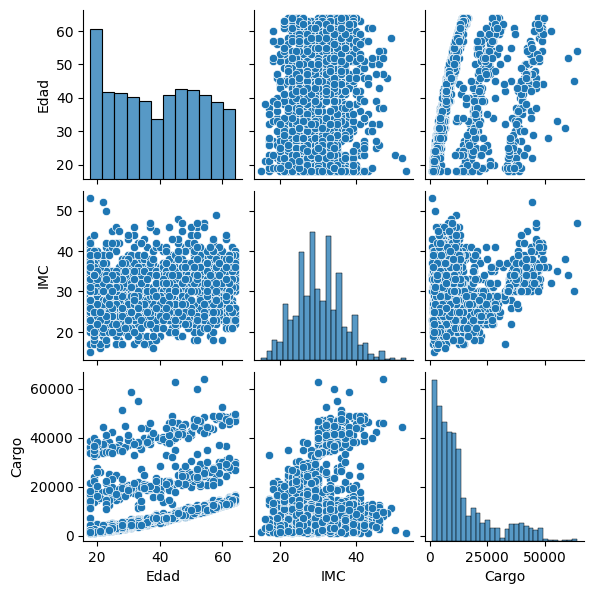

In [37]:
pair_plot=sns.pairplot(df_corr, height=2)

- Importamos librerías de algoritmos de regresión y definimos funciones auxiliares:

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [39]:
def split_train_test(df):
    train_set, test_set = train_test_split(df, test_size=0.25, random_state=72)
    train_set_x=train_set.drop(columns=['Cargo'])
    train_set_y= train_set['Cargo']
    test_set_x=test_set.drop(columns=['Cargo'])
    test_set_y= test_set['Cargo']
    return train_set_x, train_set_y, test_set_x, test_set_y

def ver_metricas(set, predict_set):
    mse = mean_squared_error(set, predict_set)
    rmse=np.sqrt(mse)
    r2_score_=r2_score(set, predict_set)
    rmse=print(f"RMSE: {round(rmse, 2)}")
    r2_score_=print(f"R2: {round(r2_score_, 2)}")
    

Regresión lineal simple(Variable Edad):

In [40]:
df_lr= pd.DataFrame(df_copy[['Edad', 'Cargo']])
df_lr.head(5)

,Edad,Cargo
0,19,16884
1,18,1725
2,28,4449
3,33,21984
4,32,3866


In [41]:
train_set_x_lrs, train_set_y_lrs, test_set_x_lrs, test_set_y_lrs= split_train_test(df_lr)

In [42]:
linearRegression_simple= LinearRegression()
linearRegression_simple.fit(train_set_x_lrs.values.reshape(-1,1), train_set_y_lrs.values)
print('Ordenada al origen:',linearRegression_simple.intercept_)
print('Pendiente :',linearRegression_simple.coef_)

Ordenada al origen: 2820.817147207523
Pendiente : [264.77909763]


In [43]:
x_min_max=np.array([[df_lr['Edad'].min()], [df_lr['Edad'].max()]])
y_predict=linearRegression_simple.predict(x_min_max)

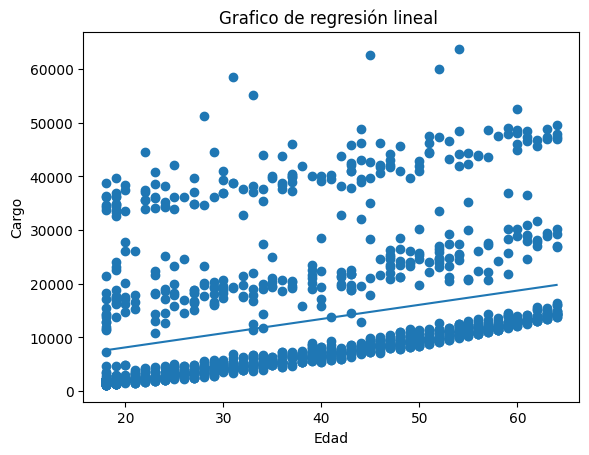

In [44]:
plt.plot(x_min_max,y_predict)
plt.scatter(df_copy['Edad'], df_copy['Cargo'])
plt.title('Grafico de regresión lineal ')
plt.xlabel('Edad')
plt.ylabel('Cargo')
plt.show()

In [45]:
y_predict_rls= linearRegression_simple.predict(test_set_x_lrs.values.reshape(-1,1))
ver_metricas(test_set_y_lrs,y_predict_rls)

RMSE: 11629.08
R2: 0.08


Regresión lineal múltiple: 

In [46]:
df_modified =pd.get_dummies(df_copy, columns=['Sexo', 'Fumador', 'Región'])

In [47]:
train_set_x, train_set_y, test_set_x, test_set_y= split_train_test(df_modified)

In [48]:
multiple_linear_model = LinearRegression()

In [49]:
multiple_linear_model.fit(train_set_x,train_set_y.values.reshape(-1, 1))

LinearRegression()

In [50]:
coefs=multiple_linear_model.coef_
coef_rounded = [np.round(x,2) for x in coefs]
coef_rounded

[array([   261.64,    348.49,    582.76,   -209.74,    209.74, -11860.04,
         11860.04,    618.87,    204.36,   -409.32,   -413.92])]

In [51]:
intercept=multiple_linear_model.intercept_
inter_rounded=[np.round(x,2) for x in intercept]
inter_rounded

[-1289.77]

In [52]:
test_pred_y_mr=multiple_linear_model.predict(test_set_x)
ver_metricas(test_set_y,test_pred_y_mr)

RMSE: 6224.98
R2: 0.74


Decision Tree Regressor

In [53]:
reg_tree= DecisionTreeRegressor(random_state=20)
scores_regr_tree= cross_val_score(reg_tree, train_set_x, train_set_y, scoring='neg_mean_squared_error', cv=10)
rmse_scores= np.sqrt(-scores_regr_tree)
print('RMSE: ', [round(x,2) for x in rmse_scores])
print('RMSE mean: ',round(rmse_scores.mean(),2))
print('Standar desviation: ',round(rmse_scores.std(),2))

RMSE:  [5931.0, 6400.33, 6751.04, 6181.55, 5978.78, 6189.53, 5774.84, 7789.59, 5562.6, 5857.69]
RMSE mean:  6241.7
Standar desviation:  606.56


Decision Tree Regressor: 

In [54]:
params = {'criterion':['squared_error'],'max_depth':[2,3,4,5,6,7,8,9,10,11], 'splitter':['best', 'random']}
Rcv_regr_tree= RandomizedSearchCV(estimator=reg_tree,param_distributions=params, scoring='neg_mean_squared_error', cv=10 )
Rcv_regr_tree.fit(train_set_x, train_set_y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=20),
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [55]:
print(Rcv_regr_tree.best_params_)
best_score= Rcv_regr_tree.best_score_
best_rmse= np.sqrt(-best_score)
print(round(best_rmse, 2))

{'splitter': 'best', 'max_depth': 3, 'criterion': 'squared_error'}
4695.75


In [56]:
best_tree=DecisionTreeRegressor(criterion='squared_error',max_depth=6, random_state=20, splitter= 'best')
best_tree.fit(train_set_x, train_set_y)
predict_y_best_tree= best_tree.predict(test_set_x)
ver_metricas(test_set_y,predict_y_best_tree)

RMSE: 5128.07
R2: 0.82


Random Forest Regressor

In [57]:
forest_regr= RandomForestRegressor()
param_rf = { "criterion" : ['squared_error'], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "n_estimators": [10,20, 50,100] }

Rcv_random_forest= RandomizedSearchCV(estimator=forest_regr,param_distributions=param_rf, scoring='neg_mean_squared_error', n_iter=10  )
Rcv_random_forest.fit(train_set_x, train_set_y)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 4, 10, 12, 16],
                                        'n_estimators': [10, 20, 50, 100]},
                   scoring='neg_mean_squared_error')

In [58]:
print(Rcv_random_forest.best_params_)
best_score= Rcv_random_forest.best_score_
best_rmse= np.sqrt(-best_score)
print(round(best_rmse, 2))

{'n_estimators': 20, 'min_samples_split': 12, 'min_samples_leaf': 5, 'criterion': 'squared_error'}
4557.79


In [59]:
best_random_fores=RandomForestRegressor(criterion='squared_error', random_state=20,n_estimators= 100, min_samples_split= 12,min_samples_leaf= 10,)
best_random_fores.fit(train_set_x, train_set_y)
predict_y_best_random_forest= best_random_fores.predict(test_set_x)
ver_metricas(test_set_y,predict_y_best_random_forest)

RMSE: 4758.13
R2: 0.85
